 # <font color='orange'>Aprendizaje no Supervisado (Parte I)</font>

#### Segmentación de clientes

In [1]:
# Importar libreria para cargar dataset

import pandas as pd

df= pd.read_excel("Retail_Invoices.xlsx")
df.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1


In [3]:
# Revisar estructura de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


In [5]:
# Resumen estadístico de los datos

df.describe()

# segmentar clientes por la cantidad de productos que compra, mayor compra = mayorista, menor = standar

,InvoiceDate,CustomerID,Quantity,price_total,StockCode
count,22190,22190.000000,22190.000000,22190.000000,22190.000000
mean,2011-06-29 05:59:15.223073536,15238.498738,221.130599,374.045327,18.333889
min,2010-12-01 00:00:00,12346.000000,-80995.000000,-168469.600000,1.000000
25%,2011-03-29 00:00:00,13755.000000,30.000000,87.962500,3.000000
50%,2011-07-08 00:00:00,15136.000000,120.000000,241.505000,12.000000
75%,2011-10-10 00:00:00,16746.000000,254.000000,418.022500,24.000000
max,2011-12-09 00:00:00,18287.000000,80995.000000,168469.600000,542.000000
std,NaN,1733.149624,1170.215301,2018.482869,23.892111


**Conclusiones de calidad de los datos**

1- Los datos están completos (sin valores nulos).

2- Hay valores negativos en Quantity y price_total, probablemente devoluciones.

3- Existen outliers extremos, por ejemplo:

Boletas con más de 80.000 productos o con montos mayores a 160.000. Esto puede afectar los algoritmos, especialmente clustering.

4- Distribuciones altamente asimétricas, con valores extremos que distorsionan las medias y desviaciones.

In [7]:
# Identificar el impacto de los valores negativos de las columnas Quantity y price_total

# Total de registros
total = len(df)

# 1. Quantity negativo
quantity_negativo = df[df["Quantity"] < 0]
print("Cantidad de registros con Quantity negativo:", len(quantity_negativo), f"({len(quantity_negativo)/total:.2%})")

# 2. price_total negativo
price_negativo = df[df["price_total"] < 0]
print("Cantidad de registros con price_total negativo:", len(price_negativo), f"({len(price_negativo)/total:.2%})")

# 3. Ambos negativos
ambos_negativos = df[(df["Quantity"] < 0) & (df["price_total"] < 0)]
print("Cantidad de registros con ambos negativos:", len(ambos_negativos), f"({len(ambos_negativos)/total:.2%})")



Cantidad de registros con Quantity negativo: 3654 (16.47%)
Cantidad de registros con price_total negativo: 3654 (16.47%)
Cantidad de registros con ambos negativos: 3654 (16.47%)


In [9]:
# Crearemos un nueva columna, que marque True si se devuelve alguna compra y podremos usar este dato mas adelante

df["Es_Devolucion"] = df["Quantity"] < 0

df

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode,Es_Devolucion
0,536365,2010-12-01,17850,40,139.12,7,False
1,536366,2010-12-01,17850,12,22.20,2,False
2,536367,2010-12-01,13047,83,278.73,12,False
3,536368,2010-12-01,13047,15,70.05,4,False
4,536369,2010-12-01,13047,3,17.85,1,False
...,...,...,...,...,...,...,...
22185,C581484,2011-12-09,16446,-80995,-168469.60,1,True
22186,C581490,2011-12-09,14397,-23,-32.53,2,True
22187,C581499,2011-12-09,15498,-1,-224.69,1,True
22188,C581568,2011-12-09,15311,-5,-54.75,1,True


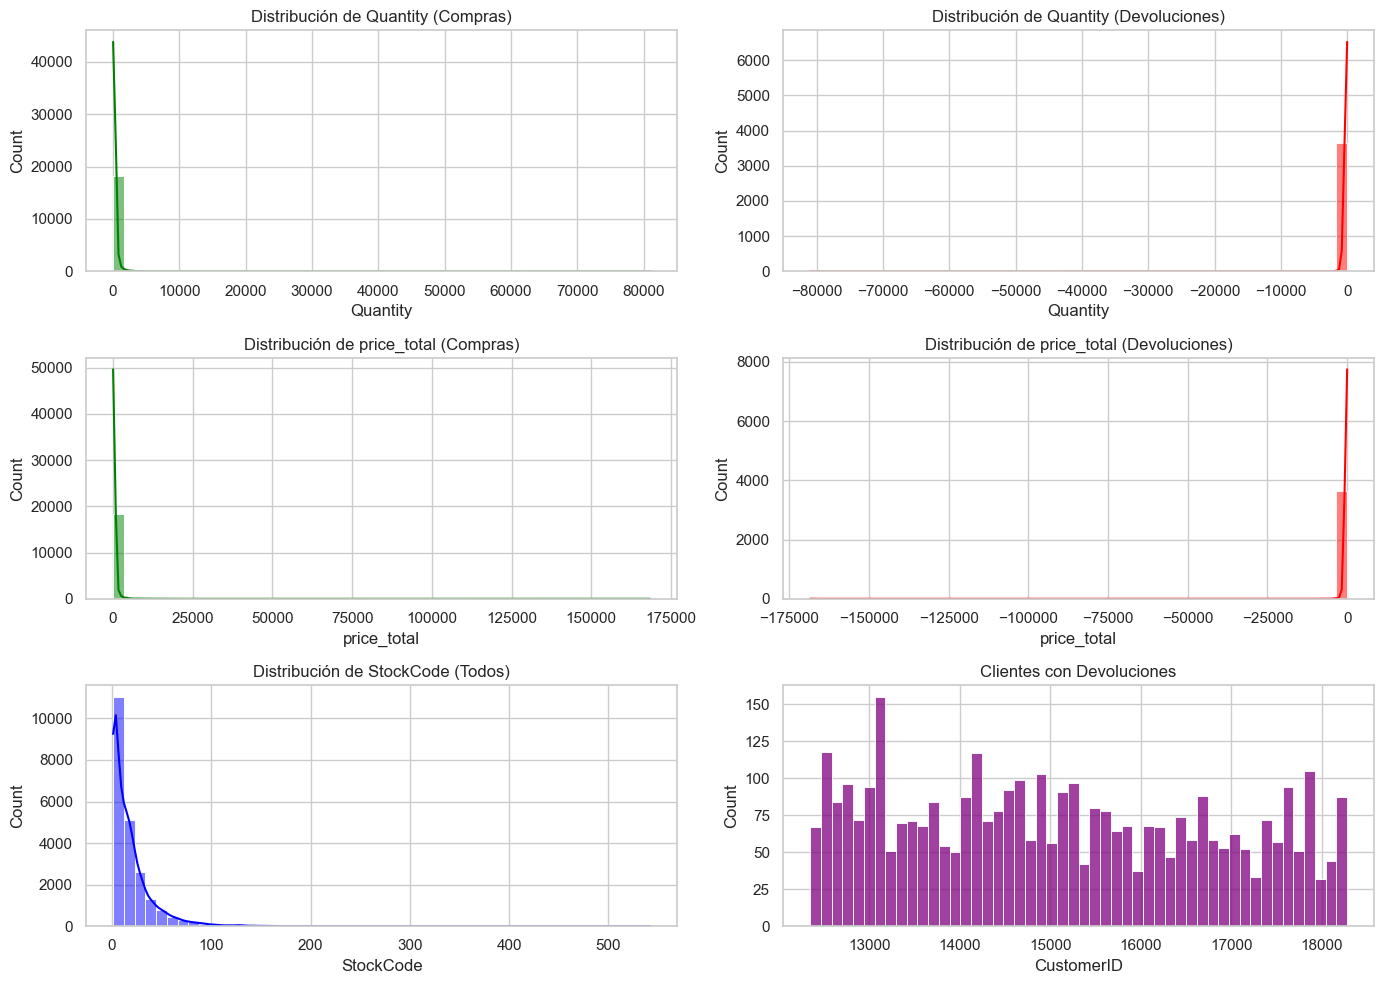

In [11]:
# Visualización de las variables numéricas con histogramas

import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")

# Filtrar registros normales (no devoluciones)
compras = df[df["Es_Devolucion"] == False]
devoluciones = df[df["Es_Devolucion"] == True]

# Crear figura
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

# Histograma Quantity
sns.histplot(compras["Quantity"], bins=50, kde=True, ax=axes[0, 0], color='green')
axes[0, 0].set_title("Distribución de Quantity (Compras)")

sns.histplot(devoluciones["Quantity"], bins=50, kde=True, ax=axes[0, 1], color='red')
axes[0, 1].set_title("Distribución de Quantity (Devoluciones)")

# Histograma price_total
sns.histplot(compras["price_total"], bins=50, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title("Distribución de price_total (Compras)")

sns.histplot(devoluciones["price_total"], bins=50, kde=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title("Distribución de price_total (Devoluciones)")

# Histograma StockCode
sns.histplot(df["StockCode"], bins=50, kde=True, ax=axes[2, 0], color='blue')
axes[2, 0].set_title("Distribución de StockCode (Todos)")

# Histogramas de devoluciones por cliente (bonus)
sns.histplot(df[df["Es_Devolucion"]]["CustomerID"], bins=50, ax=axes[2, 1], color='purple')
axes[2, 1].set_title("Clientes con Devoluciones")

plt.tight_layout()
plt.show()


**Análisis de histograma**

El análisis de las distribuciones de Quantity y price_total, tanto para compras como para devoluciones, reveló un comportamiento típico del comercio minorista: la mayoría de las transacciones corresponden a compras pequeñas y simples, mientras que una menor proporción presenta valores extremadamente altos, indicando la presencia de outliers atribuibles a clientes mayoristas o errores de carga.

Los histogramas de Quantity y price_total mostraron una alta concentración cerca de cero, con una cola larga hacia la derecha en compras (asimetría positiva) y una cola hacia la izquierda en devoluciones (asimetría negativa). Esto evidencia que las devoluciones tienden a ser de menor volumen y valor, y confirman la necesidad de tratarlas como un comportamiento distinto.

Por otro lado, la distribución de StockCode mostró que la mayoría de las boletas contienen pocos productos distintos, reforzando la idea de compras simples, pero también evidenció casos aislados de alta diversidad. Finalmente, el análisis de devoluciones por cliente mostró una distribución relativamente homogénea, sin casos extremos, lo que sugiere que el comportamiento de devolución está repartido en una parte significativa de la base de clientes y no concentrado en unos pocos.



In [13]:
# Verifiquemos el total de clientes únicos que han hecho al menos una compra o devolución.
clientes_totales = df["CustomerID"].nunique()

# Verifiquemos cuántos clientes hicieron devoluciones
clientes_con_devoluciones = df[df["Es_Devolucion"] == True]["CustomerID"].nunique()

# Clientes sin devoluciones
clientes_sin_devoluciones = clientes_totales - clientes_con_devoluciones

# Mostrar resultados
print("Clientes únicos totales:", clientes_totales)
print("Clientes que hicieron devoluciones:", clientes_con_devoluciones)
print("Clientes sin devoluciones:", clientes_sin_devoluciones)

Clientes únicos totales: 4372
Clientes que hicieron devoluciones: 1589
Clientes sin devoluciones: 2783


In [15]:
# Ahora  analizaremos si los clientes que más compran también son los que más devuelven

# Agrupamos compras
compras = df[df["Es_Devolucion"] == False].groupby("CustomerID").agg(
    monto_comprado=("price_total", "sum"),
    cantidad_comprada=("Quantity", "sum")
)

# Agrupamos devoluciones
devoluciones = df[df["Es_Devolucion"] == True].groupby("CustomerID").agg(
    monto_devuelto=("price_total", lambda x: -x.sum()),  # Convertir a positivo
    cantidad_devuelta=("Quantity", lambda x: -x.sum())
)

# Unimos las dos tablas
resumen_clientes = compras.join(devoluciones, how="outer").fillna(0)

# Calculamos % de devolución
resumen_clientes["porcentaje_devolucion_monto"] = resumen_clientes["monto_devuelto"] / resumen_clientes["monto_comprado"]
resumen_clientes["porcentaje_devolucion_cantidad"] = resumen_clientes["cantidad_devuelta"] / resumen_clientes["cantidad_comprada"]

# Mostramos las primeras filas
resumen_clientes.head()


,monto_comprado,cantidad_comprada,monto_devuelto,cantidad_devuelta,porcentaje_devolucion_monto,porcentaje_devolucion_cantidad
CustomerID,,,,,,
12346,77183.60,74215.0,77183.6,74215.0,1.0,1.0
12347,4310.00,2458.0,0.0,0.0,0.0,0.0
12348,1797.24,2341.0,0.0,0.0,0.0,0.0
12349,1757.55,631.0,0.0,0.0,0.0,0.0
12350,334.40,197.0,0.0,0.0,0.0,0.0


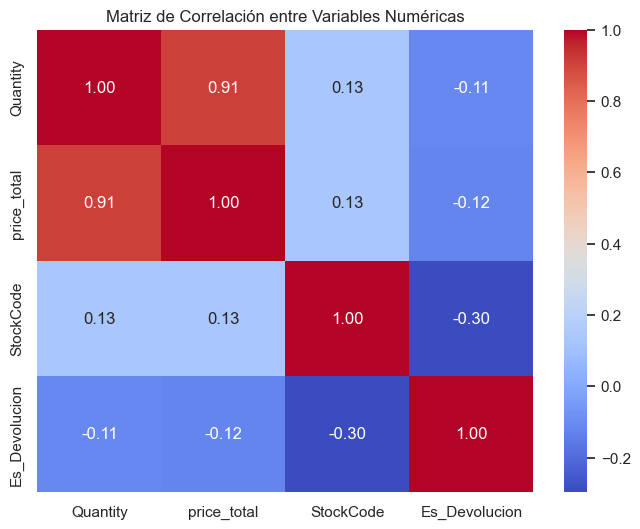

In [17]:
# Crearemos un mapa de correlación 

# Solo variables numéricas relevantes
variables_numericas = df[["Quantity", "price_total", "StockCode", "Es_Devolucion"]]

# Matriz de correlación
correlacion = variables_numericas.corr()

# Mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

**Conclusión de matriz de correlación**

Revela una fuerte relación positiva entre la cantidad de productos comprados (Quantity) y el monto total de la boleta (price_total), lo que indica coherencia en los datos. En contraste, la variedad de productos (StockCode) muestra baja correlación con las demás variables, lo que sugiere que la diversidad en las compras es una dimensión independiente del volumen o valor de compra.

Por otro lado, la variable Es_Devolucion presenta correlaciones negativas moderadas, especialmente con StockCode, lo que indica que las devoluciones tienden a ocurrir en boletas más simples, de menor valor y con menos productos distintos. Esto abre la posibilidad de utilizar esta información para identificar patrones de devolución y segmentar a los clientes según su comportamiento postventa.

**Conclusión final del análisis exploratorio**

El análisis exploratorio del dataset de ventas de FreshMart permitió identificar patrones clave en el comportamiento de compra y devolución de los clientes. Se verificó que los datos están completos y correctamente tipificados, aunque se detectaron valores extremos en Quantity y price_total, consistentes con devoluciones masivas o compras inusualmente grandes, que deberán ser considerados al modelar.

La creación de la variable Es_Devolucion permitió distinguir claramente entre compras y devoluciones, revelando que el 16,5% de las transacciones corresponden a devoluciones, y que 36% de los clientes han realizado al menos una devolución. Este comportamiento postventa representa una dimensión importante para el análisis posterior.

Los histogramas evidenciaron que la mayoría de las compras son pequeñas y simples, mientras que las devoluciones tienden a ser de menor monto y variedad. Asimismo, la variable StockCode mostró que la mayoría de las boletas contienen pocos productos distintos, pero también existen clientes con compras altamente diversas.

La matriz de correlación confirmó una fuerte relación entre Quantity y price_total, mientras que las demás variables mantienen correlaciones bajas o moderadas. En particular, se observó una correlación negativa entre Es_Devolucion y StockCode, sugiriendo que las devoluciones son más frecuentes en compras con baja variedad.

En conjunto, estos hallazgos proporcionan una base sólida para aplicar técnicas de clustering, que permitirán segmentar a los clientes según su comportamiento de compra, diversidad de productos y nivel de devoluciones, contribuyendo a una estrategia comercial más personalizada y eficaz.

**2.** Generar variables para la segmentación. Notar que la granularidad de la data es por boleta y se necesita segmentar clientes, por lo que es necesario generar variables a nivel de clientes. Se propone generar al menos RFM (Recencia, frecuencia y monto).

In [19]:
# 1. Fecha más reciente del dataset
fecha_referencia = df["InvoiceDate"].max()

# 2. Recencia: días desde la última compra por cliente
recencia = df[df["Es_Devolucion"] == False].groupby("CustomerID")["InvoiceDate"].max().reset_index()
recencia["recencia_dias"] = (fecha_referencia - recencia["InvoiceDate"]).dt.days
recencia = recencia[["CustomerID", "recencia_dias"]]

# 3. Frecuencia: número de boletas distintas por cliente
frecuencia = df[df["Es_Devolucion"] == False].groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
frecuencia.columns = ["CustomerID", "frecuencia_compras"]

# 4. Monto total comprado por cliente
monto = df[df["Es_Devolucion"] == False].groupby("CustomerID")["price_total"].sum().reset_index()
monto.columns = ["CustomerID", "monto_total"]

# 5. Unir todo en tabla RFM
rfm = recencia.merge(frecuencia, on="CustomerID").merge(monto, on="CustomerID")
rfm.head()

,CustomerID,recencia_dias,frecuencia_compras,monto_total
0,12346,325,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,18,1,1757.55
4,12350,310,1,334.40


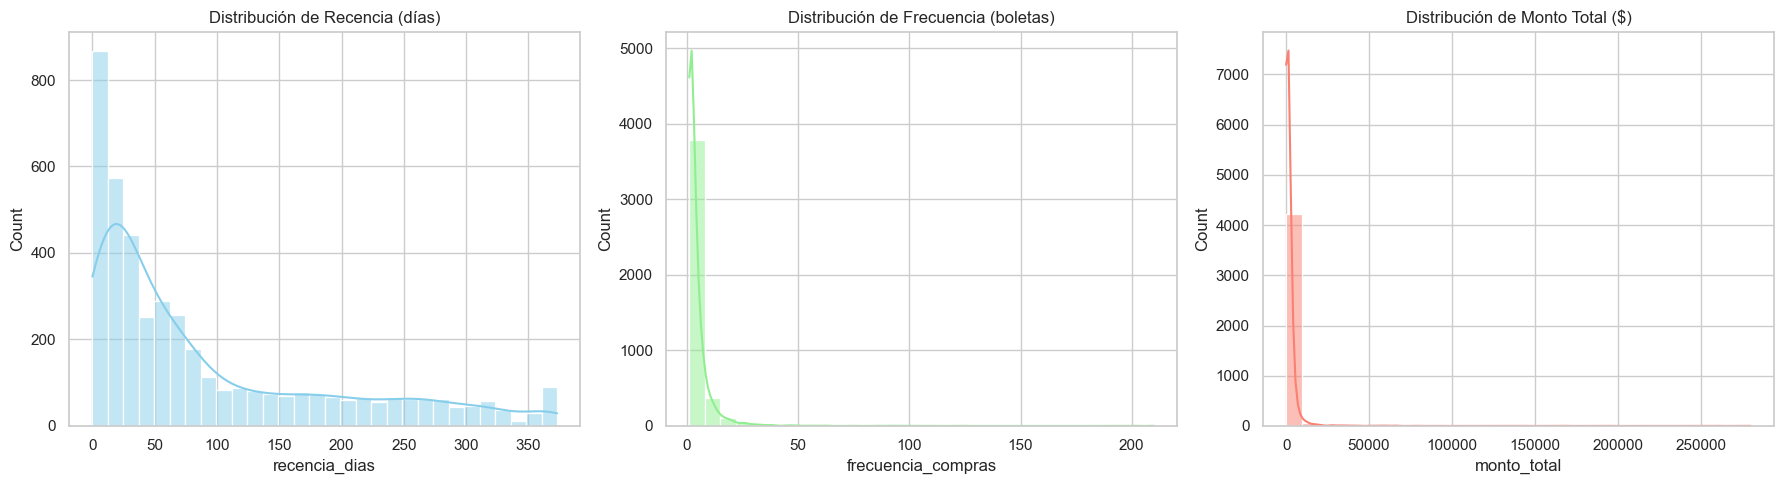

In [21]:
# Empezamos graficando histogramas para ver cómo están distribuidas las 3 variables.

# Estilo visual
sns.set(style="whitegrid")

# Crear figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma de Recencia
sns.histplot(data=rfm, x="recencia_dias", bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribución de Recencia (días)")

# Histograma de Frecuencia
sns.histplot(data=rfm, x="frecuencia_compras", bins=30, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title("Distribución de Frecuencia (boletas)")

# Histograma de Monto
sns.histplot(data=rfm, x="monto_total", bins=30, kde=True, ax=axes[2], color='salmon')
axes[2].set_title("Distribución de Monto Total ($)")

plt.tight_layout()
plt.show()


**Conclusión general de los histogramas RFM**

Las tres variables RFM presentan distribuciones altamente asimétricas, lo que requiere aplicar transformaciones antes de realizar un análisis de segmentación. La variable recencia muestra una concentración de clientes con compras recientes y una larga cola de inactivos, por lo que se recomienda aplicar una transformación logarítmica seguida de una normalización. La frecuencia de compras también es muy sesgada, ya que la mayoría de los clientes han comprado pocas veces, con unos pocos clientes muy frecuentes; esto también justifica el uso de logaritmo y normalización. Por último, el monto total gastado presenta una alta concentración de valores bajos y casos extremos de clientes con grandes gastos, por lo que igualmente se recomienda aplicar una transformación logarítmica y posterior normalización. Estas transformaciones permitirán que cada variable tenga un peso equitativo en el modelo de clustering y que los resultados no se vean distorsionados por outliers o escalas desbalanceadas.

**3.** Realizar un análisis exploratorio y las transformaciones necesarias a las nuevas variables.

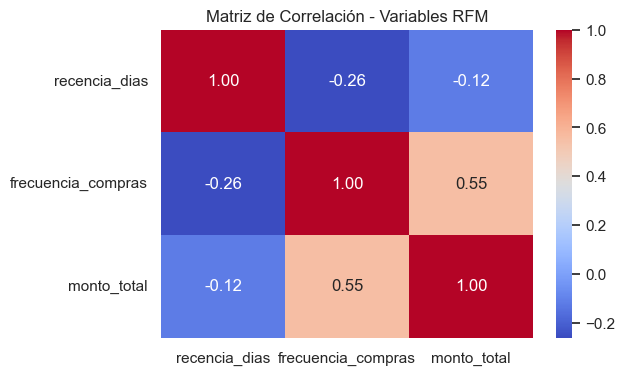

In [23]:
# Vamos a realizar ahora una matriz de correlación del nuevo DataFrame con las variables RFM a nivel cliente

# Matriz de correlación del RFM
rfm_corr = rfm[["recencia_dias", "frecuencia_compras", "monto_total"]].corr()

# Mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(rfm_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - Variables RFM")
plt.show()

**Conclusión Matriz de correlación de DF rfm**

El análisis de la matriz de correlación de las variables RFM muestra que frecuencia de compra y monto total gastado presentan una correlación positiva moderada (0.55), lo cual indica que los clientes que compran con mayor frecuencia tienden a gastar más, algo esperable en el comportamiento de consumo. Por otro lado, recencia muestra correlaciones negativas bajas tanto con la frecuencia (-0.26) como con el monto (-0.12), lo que sugiere que esta variable aporta información distinta sobre la actualidad del cliente, sin ser redundante con las otras dos.

In [25]:
# Empezamos con las transformaciones

from sklearn.preprocessing import StandardScaler
import numpy as np

# Aplicar transformación logarítmica con log1p para evitar log(0)
rfm_transformado = rfm.copy()
rfm_transformado["recencia_log"] = np.log1p(rfm_transformado["recencia_dias"])
rfm_transformado["frecuencia_log"] = np.log1p(rfm_transformado["frecuencia_compras"])
rfm_transformado["monto_log"] = np.log1p(rfm_transformado["monto_total"])

# Normalizar con StandardScaler
scaler = StandardScaler()
rfm_transformado[["recencia_scaled", "frecuencia_scaled", "monto_scaled"]] = scaler.fit_transform(
    rfm_transformado[["recencia_log", "frecuencia_log", "monto_log"]]
)

# Mostrar resultados finales listos para clustering
rfm_final = rfm_transformado[["CustomerID", "recencia_scaled", "frecuencia_scaled", "monto_scaled"]]
rfm_final

,CustomerID,recencia_scaled,frecuencia_scaled,monto_scaled
0,12346,1.435661,-0.955013,3.696168
1,12347,-1.953295,1.074523,1.408758
2,12348,0.383063,0.386437,0.715517
3,12349,-0.619028,-0.955013,0.697821
4,12350,1.401611,-0.955013,-0.615877
...,...,...,...,...
4334,18280,1.320527,-0.955013,-1.102307
4335,18281,1.010332,-0.955013,-1.734438
4336,18282,-1.244297,-0.361412,-1.113519
4337,18283,-1.745343,2.178046,0.836954


**Análisis**

Las variables RFM (recencia, frecuencia y monto) presentaban distribuciones altamente asimétricas, con valores muy concentrados en rangos bajos y algunos casos extremos. Esta condición puede afectar negativamente los algoritmos de clustering, ya que estos son sensibles a la escala y pueden ser dominados por variables con valores grandes o con outliers.

Por esta razón, primero se aplicó una transformación logarítmica (log1p) para reducir la asimetría y comprimir los valores extremos. Posteriormente, se utilizó normalización estándar (StandardScaler) para llevar todas las variables a una misma escala con media 0 y desviación estándar 1. Esto asegura que ninguna variable pese más que otra en el proceso de segmentación.

Gracias a estas transformaciones, el conjunto de datos ahora está equilibrado y preparado para aplicar técnicas de agrupamiento como K-Means de forma más precisa y confiable.

**4.** Aplicar al menos 2 algoritmos de clustering. Buscar el número indicado de clusters que pueden tener y visualizar los cluster resultantes de los algoritmos.

Usaremos K_means y luego DBSCAN 

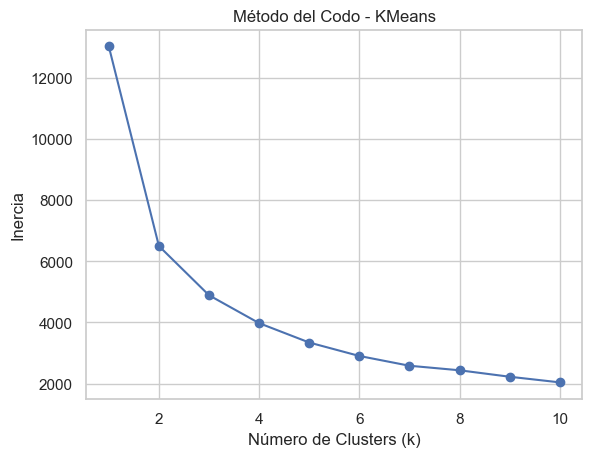

In [27]:
# K-means
# Usaremos metodo del codo para ver la cantidad de clusters a usar

from sklearn.cluster import KMeans

X = rfm_final[["recencia_scaled", "frecuencia_scaled", "monto_scaled"]]

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.title("Método del Codo - KMeans")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

In [31]:
# Aplicar KMeans con k=4
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_final.loc[:, "cluster"] = kmeans.fit_predict(rfm_final[["recencia_scaled", "frecuencia_scaled", "monto_scaled"]])

# Mostrar algunos resultados
rfm_final["cluster"].value_counts().sort_index()


cluster
0     845
1     697
2    1610
3    1187
Name: count, dtype: int64

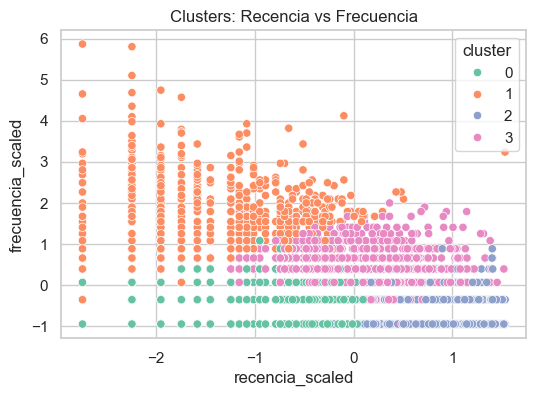

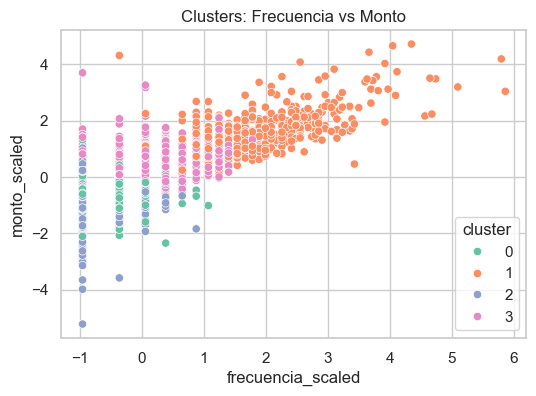

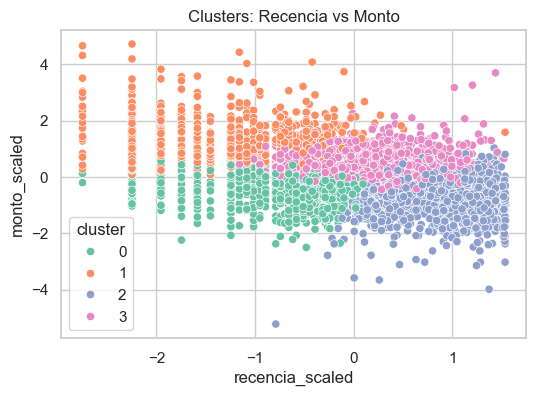

In [33]:
# Visualización de clusters con graficos de disperción

# Estilo
sns.set(style="whitegrid")

# Primer gráfico: Recencia vs Frecuencia
plt.figure(figsize=(6,4))
sns.scatterplot(data=rfm_final, x="recencia_scaled", y="frecuencia_scaled", hue="cluster", palette="Set2")
plt.title("Clusters: Recencia vs Frecuencia")
plt.show()

# Segundo gráfico: Frecuencia vs Monto
plt.figure(figsize=(6,4))
sns.scatterplot(data=rfm_final, x="frecuencia_scaled", y="monto_scaled", hue="cluster", palette="Set2")
plt.title("Clusters: Frecuencia vs Monto")
plt.show()

# Tercer gráfico: Recencia vs Monto
plt.figure(figsize=(6,4))
sns.scatterplot(data=rfm_final, x="recencia_scaled", y="monto_scaled", hue="cluster", palette="Set2")
plt.title("Clusters: Recencia vs Monto")
plt.show()


**Conclusión**

Se realizarón tres visualizaciones para comprender el comportamiento de los clientes en función de las variables RFM escaladas: recencia, frecuencia y monto total. A continuación, se presentan las principales observaciones:

**Recencia vs Frecuencia**

El gráfico muestra que los clientes se agrupan de forma clara según su frecuencia de compra y el tiempo desde su última compra.

El clúster naranja (1) representa clientes muy frecuentes y recientes, potencialmente los más valiosos.

El clúster azul (2) reúne a clientes que no compran hace tiempo y lo hacen con poca frecuencia, posiblemente inactivos.

El clúster rosado (3) está en una zona intermedia, con frecuencia moderada y recencia media.

El clúster verde (0) agrupa a clientes que han comprado recientemente, pero con poca frecuencia.

**Frecuencia vs Monto**

Se observa una correlación positiva: a mayor frecuencia, mayor gasto total.

El clúster naranja (1) nuevamente destaca por su alta frecuencia y alto gasto.

Los clústeres verde (0) y azul (2) concentran clientes con bajo gasto, siendo el azul el más bajo.

El clúster rosado (3) tiene un comportamiento moderado, con algunos clientes de gasto elevado.

**Recencia vs Monto**

Este gráfico permite identificar qué tan valiosos son los clientes más recientes.

El clúster naranja (1) muestra clientes recientes y con alto gasto, ideales para fidelizar.

El clúster azul (2) representa a quienes no compran hace tiempo y además gastaron poco, un grupo de bajo valor.

El clúster rosado (3) contiene clientes activos de gasto medio.

El clúster verde (0) puede contener nuevos clientes o de compras pequeñas recientes.

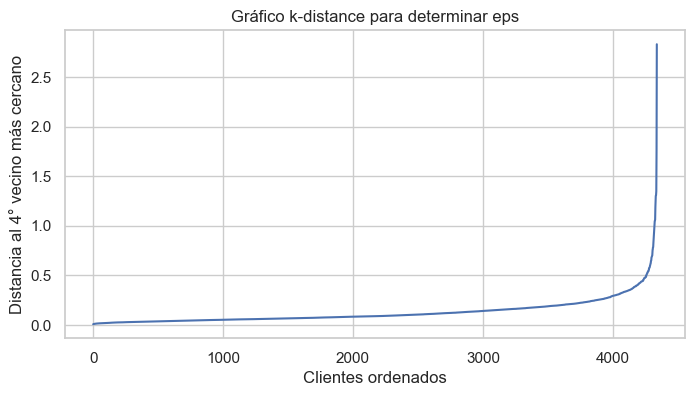

In [38]:
# DBSCAN

# Determinaremos un buen valor de eps usando un gráfico k-distance (muy similar al método del codo).

from sklearn.neighbors import NearestNeighbors

# Seleccionamos las variables escaladas
X = rfm_final[["recencia_scaled", "frecuencia_scaled", "monto_scaled"]]

# Definimos el número de vecinos (min_samples - 1)
k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Ordenamos la distancia al k-ésimo vecino
distances = np.sort(distances[:, k-1])

# Graficamos
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title("Gráfico k-distance para determinar eps")
plt.xlabel("Clientes ordenados")
plt.ylabel(f"Distancia al {k}° vecino más cercano")
plt.grid(True)
plt.show()


**Análisis de grafico k-distance**

El gráfico k-distance representa la distancia desde cada punto hasta su k-ésimo vecino más cercano (en este caso, el 4.º más cercano). Los puntos están ordenados en el eje X según su distancia creciente, y en el eje Y se visualiza la distancia a su vecino.

Este gráfico nos ayuda a identificar el valor óptimo de eps (radio de vecindad) para el algoritmo DBSCAN. El objetivo es encontrar el "codo" o punto de inflexión en la curva: es donde la pendiente comienza a aumentar bruscamente. En este caso, el quiebre se observa alrededor del valor 0.35, lo cual indica que ese es un buen valor para eps.

Elegir este valor permite que el algoritmo distinga entre grupos de puntos densamente conectados (clusters) y puntos aislados (ruido), logrando una segmentación más coherente y evitando tanto la sobre-segmentación como la unión de grupos dispares.

In [43]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN con los parámetros seleccionados
dbscan = DBSCAN(eps=0.35, min_samples=5)

# Asignar los clústeres al DataFrame 
rfm_final.loc[:, "cluster_dbscan"] = dbscan.fit_predict(
    rfm_final[["recencia_scaled", "frecuencia_scaled", "monto_scaled"]]
)

# Ver cuántos clústeres y ruido detectó
cluster_counts = rfm_final["cluster_dbscan"].value_counts().sort_index()
print("Cantidad de clientes por clúster:")
print(cluster_counts)


Cantidad de clientes por clúster:
cluster_dbscan
-1     168
 0    1864
 1    1469
 2     824
 3       5
 4       4
 5       5
Name: count, dtype: int64


**Análisis**

DBSCAN identificó 6 clústeres (0 a 5) más un grupo de ruido (-1).

Clústeres 0, 1 y 2 concentran el 99% de los clientes, lo cual indica que hay 3 patrones principales de comportamiento.

Clústeres 3, 4 y 5 son demasiado pequeños (5 o menos clientes cada uno).
Es probable que representen outliers agrupados forzadamente.

B168 clientes quedaron fuera de cualquier grupo, considerados outliers o comportamientos anómalos.

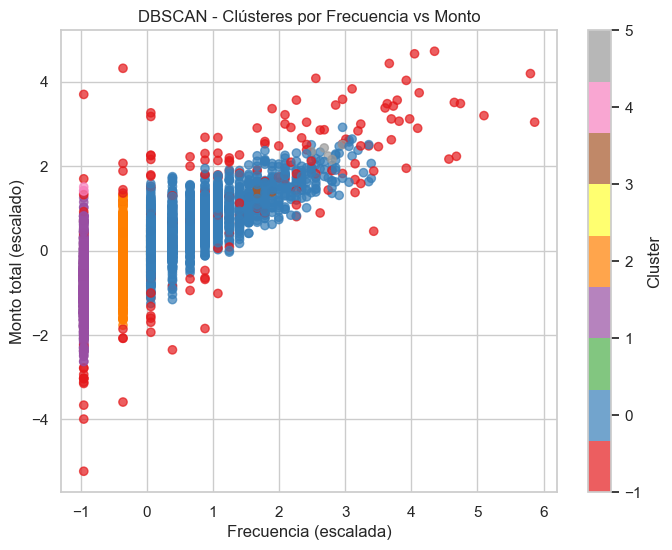

In [46]:
# Vamos a graficas

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    rfm_final["frecuencia_scaled"],
    rfm_final["monto_scaled"],
    c=rfm_final["cluster_dbscan"],
    cmap="Set1",
    alpha=0.7
)
plt.xlabel("Frecuencia (escalada)")
plt.ylabel("Monto total (escalado)")
plt.title("DBSCAN - Clústeres por Frecuencia vs Monto")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()


**Conclusión**

DBSCAN identificó un clúster grande representando el comportamiento más común o denso (clúster 0).

El resto de puntos se distribuyen en pequeños clústeres o como ruido, lo que puede indicar poca estructura natural en los extremos.

Es importante considerar que DBSCAN no obliga a todos los puntos a pertenecer a un clúster (a diferencia de K-Means), lo cual es útil si sospechamos de outliers o ruido.

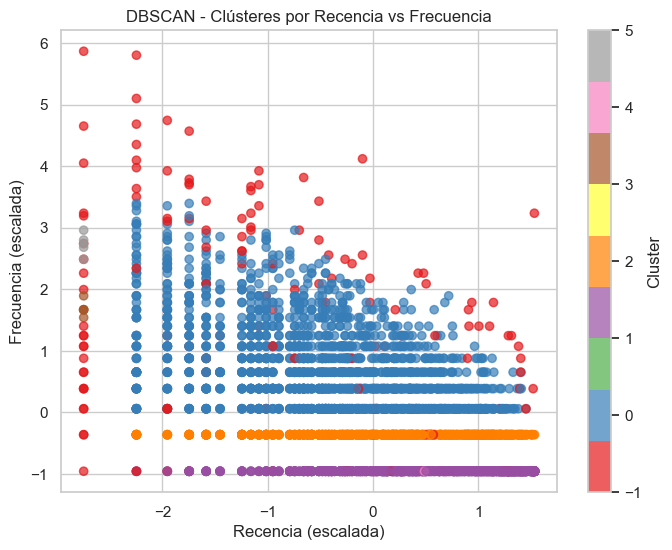

In [50]:
# Segúndo grafico

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    rfm_final["recencia_scaled"],
    rfm_final["frecuencia_scaled"],
    c=rfm_final["cluster_dbscan"],
    cmap="Set1",
    alpha=0.7
)
plt.xlabel("Recencia (escalada)")
plt.ylabel("Frecuencia (escalada)")
plt.title("DBSCAN - Clústeres por Recencia vs Frecuencia")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

**Conclusión general**

DBSCAN logra aislar puntos atípicos (ruido) sin forzarlos a pertenecer a un clúster, lo que es útil para identificar comportamientos inusuales.

El clúster 0 sigue siendo el grupo dominante de clientes recientes y frecuentes.

Este tipo de visualización permite comparar patrones de comportamiento de compra que no son fácilmente detectables con métodos como K-Means.

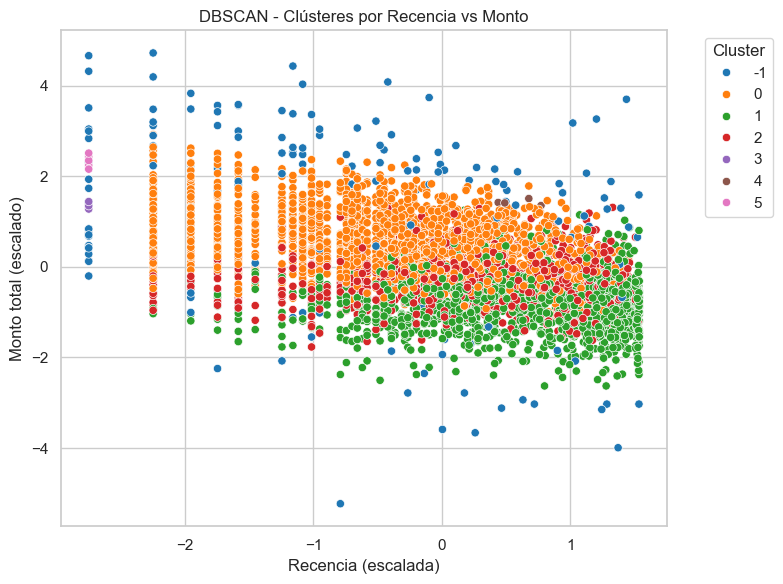

In [54]:
# Tercer grafico 

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=rfm_final,
    x="recencia_scaled",
    y="monto_scaled",
    hue="cluster_dbscan",
    palette="tab10"
)
plt.title("DBSCAN - Clústeres por Recencia vs Monto")
plt.xlabel("Recencia (escalada)")
plt.ylabel("Monto total (escalado)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Conclusión**

Este gráfico refuerza que los clústeres formados por DBSCAN capturan distintos patrones de comportamiento en cuanto a la frecuencia de compra y gasto acumulado, con especial énfasis en la identificación de clientes atípicos o marginales (cluster -1), lo que diferencia a este algoritmo de K-Means. Es útil si se busca identificar tanto clientes relevantes como aquellos que podrían no ajustarse a ningún perfil claro.

**Resumen Comparativo: K-Means vs DBSCAN**
**K-Means**
Cantidad de clústeres: 4 (determinado con el método del codo).

Ventajas observadas:

Segmentación clara y bien distribuida.

Buena agrupación de los clientes según sus características RFM.

Fácil de interpretar y visualizar.

Limitaciones:

Obliga a definir el número de clústeres previamente.

No identifica clientes atípicos (outliers).

Asume que todos los clústeres son de forma esférica y de tamaño similar.

**DBSCAN**
Cantidad de clústeres: 6 (incluyendo un grupo de ruido cluster = -1).

Ventajas observadas:

No requiere definir el número de clústeres con anticipación.

Identifica outliers (clientes con comportamiento atípico) de manera efectiva.

Detecta clústeres de diferentes formas y densidades.

Limitaciones:

Más sensible a la elección de los parámetros eps y min_samples.

Puede generar muchos micro-clústeres si los parámetros no están bien calibrados.

**Conclusión**

K-Means es una excelente opción para obtener una segmentación general y homogénea de los clientes, ideal cuando se quiere categorizar claramente en un número definido de grupos.

DBSCAN ofrece una visión más detallada y flexible, permitiendo identificar clientes únicos o atípicos, lo que resulta valioso para estrategias personalizadas o detectar comportamientos inusuales.

Utilizar ambos algoritmos complementariamente enriquece el análisis, permitiendo abordar la segmentación desde diferentes perspectivas.

**5.** Evaluar la calidad de los clustering de forma numérica y realizar una explicación de cada segmento asignándoles un nombre descriptivo.

Evaluación Numérica de la Calidad del Clustering, usaremos la metrica Silhouette Score.

Mide qué tan bien separados están los clústeres entre sí y qué tan cohesionados son internamente.

Valor entre -1 y 1:

0.7 = estructura fuerte.

0.5–0.7 = estructura razonable.

<0.5 = posible solapamiento o agrupación débil.



In [61]:
from sklearn.metrics import silhouette_score

# Para KMeans
score_kmeans = silhouette_score(
    rfm_final[["recencia_scaled", "frecuencia_scaled", "monto_scaled"]],
    rfm_final["cluster"]
)
print(f"Silhouette Score para KMeans: {score_kmeans:.2f}")

# Para DBSCAN (solo si hay más de un clúster distinto de -1)
labels_dbscan = rfm_final["cluster_dbscan"]
if len(set(labels_dbscan)) > 1 and -1 in set(labels_dbscan):
    mask = labels_dbscan != -1  # Excluir outliers
    score_dbscan = silhouette_score(
        rfm_final.loc[mask, ["recencia_scaled", "frecuencia_scaled", "monto_scaled"]],
        labels_dbscan[mask]
    )
    print(f"Silhouette Score para DBSCAN (sin outliers): {score_dbscan:.2f}")


Silhouette Score para KMeans: 0.33
Silhouette Score para DBSCAN (sin outliers): 0.10


Silhouette Score para KMeans: 0.33
Moderado. Los clústeres tienen cierta separación, pero puede haber solapamiento entre grupos.

Silhouette Score para DBSCAN (sin outliers): 0.10
Bajo. Los clústeres están poco definidos y hay bastante ruido (outliers), lo que hace más difícil identificar grupos claramente separados.

KMeans ha generado una segmentación con estructura algo definida, pero no óptima.

DBSCAN, aunque útil para detectar anomalías, no ha producido grupos bien diferenciados en este caso.

**Conclusión:** Para fines de segmentación clara y explicable, KMeans es más adecuado en este contexto.

In [64]:
# Explicación y nombramiento de los segmentos.

rfm_summary_kmeans = rfm_final.groupby("cluster").agg({
    "recencia_scaled": "mean",
    "frecuencia_scaled": "mean",
    "monto_scaled": "mean",
    "CustomerID": "count"
}).rename(columns={"CustomerID": "cantidad_clientes"})

print(rfm_summary_kmeans)


         recencia_scaled  frecuencia_scaled  monto_scaled  cantidad_clientes
cluster                                                                     
0              -0.752062          -0.445352     -0.458356                845
1              -1.304768           1.667576      1.394295                697
2               0.906771          -0.761735     -0.768064               1610
3               0.071621           0.371032      0.549343               1187


**Resumen Descriptivo de Segmentos**

**Clientes VIP (Cluster 1)**
Son clientes muy recientes, que compran con mucha frecuencia y gastan bastante. Son los más valiosos para la empresa.

**Clientes Leales (Cluster 3)**
Han comprado recientemente, con frecuencia moderada y gasto medio. Representan una buena base estable de ingresos.

**Clientes Ocasionales (Cluster 0)**
Compran esporádicamente, gastan poco y no lo hacen con frecuencia. Hay potencial para activarlos con promociones.

**Clientes Perdidos (Cluster 2)**
Hace mucho que no compran, tienen baja frecuencia y gastan muy poco. Son candidatos a campañas de recuperación.